In [1]:
# ------ Imports/Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from string import punctuation
import re

plt.style.use('ggplot')
%matplotlib inline 

---
### EDA

In [2]:
# Get train data 
Train = pd.read_csv('../data/train.csv')

In [3]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2834 non-null   object 
 1   url_legal       830 non-null    object 
 2   license         830 non-null    object 
 3   excerpt         2834 non-null   object 
 4   target          2834 non-null   float64
 5   standard_error  2834 non-null   float64
dtypes: float64(2), object(4)
memory usage: 133.0+ KB


<AxesSubplot:title={'center':'Target'}, ylabel='Frequency'>

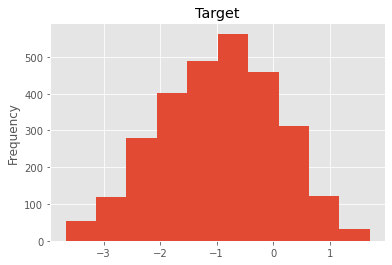

In [4]:
Train['target'].plot(kind = 'hist', title = 'Target')

<AxesSubplot:title={'center':'Standard Error'}, ylabel='Frequency'>

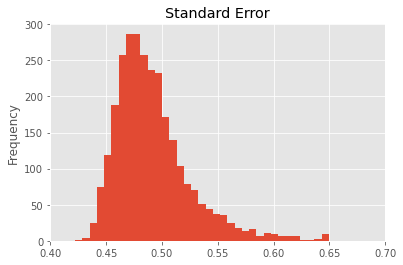

In [5]:
Train['standard_error'].plot(kind = 'hist', title = 'Standard Error', bins = 100, 
                            xlim = (0.4, 0.7))

In [6]:
Train['excerpt'][0]

'When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.\nThe floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.\nAt each end of the room, on the wall, hung a beautiful bear-skin rug.\nThese rugs were for prizes, one for the girls and one for the boys. And this was the game.\nThe girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole. Each player was given a small flag which they were to plant on reaching the Pole.\nThis would have been an easy matter, but each traveller was obliged to wear snowshoes.'

In [7]:
Train['license'].value_counts()

CC BY 4.0                                 391
CC BY-SA 3.0 and GFDL                     196
CC BY-SA 3.0                              192
CC BY-NC-SA 2.0                            26
CC BY 3.0                                   7
CC BY-NC-SA 4.0                             4
CC BY-NC-ND 4.0                             3
CC BY-NC                                    2
CC BY-NC-SA 3.0                             2
CC BY NC-SA 2.0                             2
GNU Free Document License, version 1.2      1
CC BY-NC 3.0                                1
CC-BY-SA                                    1
CC-BY-NC                                    1
CC BY-NC 2.0                                1
Name: license, dtype: int64

In [8]:
Train['url_legal'].value_counts()

https://www.africanstorybook.org/                               118
https://www.africanstorybook.org/#                               46
https://simple.wikipedia.org/wiki/Voltage                         2
https://en.wikipedia.org/wiki/Watergate_scandal                   1
https://en.wikipedia.org/wiki/Rebellion                           1
                                                               ... 
https://en.wikipedia.org/wiki/Oil_refinery                        1
https://en.wikipedia.org/wiki/Socrates                            1
https://www.commonlit.org/texts/the-value-of-being-confused       1
https://en.wikipedia.org/wiki/Mitosis                             1
https://kids.frontiersin.org/article/10.3389/frym.2014.00005      1
Name: url_legal, Length: 667, dtype: int64

In [9]:
data = Train.copy()
data

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845
...,...,...,...,...,...,...
2829,25ca8f498,https://sites.ehe.osu.edu/beyondpenguins/files...,CC BY-SA 3.0,When you think of dinosaurs and where they liv...,1.711390,0.646900
2830,2c26db523,https://en.wikibooks.org/wiki/Wikijunior:The_E...,CC BY-SA 3.0,So what is a solid? Solids are usually hard be...,0.189476,0.535648
2831,cd19e2350,https://en.wikibooks.org/wiki/Wikijunior:The_E...,CC BY-SA 3.0,The second state of matter we will discuss is ...,0.255209,0.483866
2832,15e2e9e7a,https://en.wikibooks.org/wiki/Geometry_for_Ele...,CC BY-SA 3.0,Solids are shapes that you can actually touch....,-0.215279,0.514128


---
---
# Functions 

In [10]:
# ------------------------------------
def word_lenth_counts(text):
    '''
        Return: 
            Dictionry of words length counts 
    '''
    
    d = {"1_letter": 0, 
         "2_letter": 0, 
         "3_letter": 0, 
         "4_letter": 0, 
         "5_letter": 0, 
         "6_letter": 0, 
         "7_letter": 0, 
         "8_letter": 0, 
         "9_letter": 0, 
         "10_letter": 0, 
         "11_letter": 0, 
         "12_letter": 0
    }

    text.replace('\n', '')
    text = text.lower()
    n_text = ''
    for c in text: 
        if c not in punctuation:
            n_text += c
        else: n_text += ' '

    text = n_text
    for word in text.split(' '): 
        wl = len(word)
        if wl > 0:
            if len(word) >= 12: key = f"12_letter"
            else:  key = f"{len(word)}_letter"

            d[key] += 1; 
    return d
# ------------------------------------
def source_info(text):
    '''
        Return: 
            Dictionary of source wiki, article, book, details, story or stories, kid, edu, simple
    '''
    d = dict()
    source_type = ['wiki', 'article', 'book', 'details', 'kid', 'edu', 'simple', 'story', 'stories']
    
    for t in source_type:
        if t != 'stories': 
            d[t] = 0
            
        if t in text:
            if t == 'stories': 
                d['story'] = 1;
            else: d[t] = 1
    return d
# ------------------------------------
def document_info(text):
    '''
        Return:
            Dictionary of document lenght, word count, sentence count, average word lenght
    '''
    text_lenght = len(text)
    text = text.replace('\n', ' ')
    text_word_count = len(text.split(' '))
    text_sentence_count = len(text.split('.'))
    text_avg_word_length = round(sum([len(t) for t in text.split(' ')]) / text_word_count, 2)

    document_info = {
        'doc_len': text_lenght,
        'word_count': text_word_count,
        'sent_count': text_sentence_count,
        'avg_word_len': text_avg_word_length
    }

    return document_info
    
# ------------------------------------
def character_counts(text):
    '''
        Return:
            Dictionary of counts of all characters in text
    '''
    char_dict = dict()
    text = text.lower()
    text = text.replace('\n', ' ')
    
    for char in text:
        if char not in char_dict:
            char_dict[char] = 0
        
        char_dict[char] += 1     
        
    return char_dict

# ------------------------------------
def phonemes_counts(text):
    '''
        Return: 
            Dictionay of all phonemic in text
    '''
    phonemes = ['ck', 'cc', 'di', 'nn', 'dd', 'ai', 'ss', 'mn', 'bb', 
                'sci', 'ze', 'qu', 'se', 'sc', 'ci', 'ps', 'si', 'tch', 
                'ngue', 'st', 'gu', 'th', 'pn', 've', 'te', 'zz', 'au', 
                'lm', 'lf', 'ge', 'wh', 'tu', 'wr', 'ph', 'sh', 'mm', 'gh', 
                'dge', 'ft', 'tt', 'ed', 'ng', 'lk', 'ti', 'gue', 'rr', 'ch', 
                'll', 'gn', 'ff', 'gg', 'pp', 'rh', 'ce', 'mb', 'kn', 
                'eer', 'ere', 'uy', 'ho', 'ear', 'ei', 'ar', 'ai', 
                'oor', 'ure', 'eigh', 'ey', 'is', 'ae', 'ow', 'or', 'ew', 
                'ore', 'ur', 'uoy', 'air', 'au', 'ough', 'yr', 
                'ea', 'ayer', 'augh', 'aw', 'eau', 'aigh', 'igh', 'oy', 
                'oo', 'ue', 'are', 'ee', 'oa', 'et', 'y', 'er', 'eir', 
                'oew', 'oar', 'ie', 'eo', 'ui', 'ier', 'ou', 'ir', 'oi', 
                'ay', 'ye', 'oe', 'our']
    temp_dict = dict()
    
    # lower text 
    text = text.lower()
    
    for p in phonemes:
        temp_dict[p] = text.count(p)
    
    return temp_dict

# End Functions 
---

---
## Column: URL / Text Source 


In [11]:
data['url_legal'] = data['url_legal'].astype(str)

In [12]:
series_source = data['url_legal'].apply(lambda x: source_info(x))

In [13]:
df_source = pd.DataFrame(list(series_source))

len | Document Type |
----|---------------|
4|African Story Book|
5|Wiki|
6|Article, Wiki|
7|Wiki, Books, files 
8|kid, book|
9|edu, stories

---
## Column: Excerpt / Text / Document 


[Phonemes](https://www.dyslexia-reading-well.com/44-phonemes-in-english.html)

In [14]:
series_documents =  data.excerpt.apply(lambda x: document_info(x))
series_phonemes = data.excerpt.apply(lambda x: phonemes_counts(x))
series_characters =  data.excerpt.apply(lambda x: character_counts(x))
series_word_length = data.excerpt.apply(lambda x: word_lenth_counts(x))

In [15]:
df_documents = pd.DataFrame(list(series_documents))
df_phonemes = pd.DataFrame(list(series_phonemes))
df_chracters = pd.DataFrame(list(series_characters))
df_word_lenght = pd.DataFrame(list(series_word_length))

---
### -------------------------------- Fix data errors 

In [16]:
# Make na 0
df_chracters.fillna(0, inplace = True)

# Make all ints
for col in df_chracters.columns:
    df_chracters[col] = df_chracters[col].astype(int, copy=False)

## ----------------------- Set up model 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [18]:
X = pd.concat([df_documents, df_phonemes, df_chracters, df_source, df_word_lenght], axis = 1)
y = np.round(data['target'], 2)

In [19]:
# test train split 
X_train, X_test, y_train, y_test = train_test_split(X, np.abs(y), test_size=0.33, random_state=42)

---
## ------------------------- Random Forest ?

    df_documents, df_phonemes, df_chracters & data.target

In [20]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
pred = rfr.predict(X_test)
mean_squared_error(y_test, pred, squared = False)

0.6723731245296346

## ------ Feature Imporatnce 

In [21]:
df_feature_importance = pd.DataFrame(data = rfr.feature_importances_, 
                                     index = X.columns, 
                                     columns = ['feature_importance'])

In [22]:
df_feature_importance.sort_values(by = ['feature_importance'], ascending=False).head(20)

,feature_importance
avg_word_len,0.119018
2_letter,0.061877
i,0.047895
12_letter,0.039734
f,0.028705
kid,0.027737
9_letter,0.022489
4_letter,0.019786
;,0.017448
10_letter,0.012531


---
## ------------------------- Gradient Boosting


In [23]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
pred = gbr.predict(X_test)
mean_squared_error(y_test, pred, squared = False)

0.6543900352714964

---
# ---------------------- Ada Boost

In [24]:
abr = AdaBoostRegressor()
abr.fit(X_train, y_train)
pred = abr.predict(X_test)
mean_squared_error(y_test, pred, squared = False)

0.7024497395286088

In [28]:
X.to_csv("X.csv")
y.to_csv("y.csv")

0      -0.34
1      -0.32
2      -0.58
3      -1.05
4       0.25
        ... 
2829    1.71
2830    0.19
2831    0.26
2832   -0.22
2833    0.30
Name: target, Length: 2834, dtype: float64